In [1]:
import pandas as pd
import numpy as np

missing_values = ["n/a", "na", "Infinity", "NaN","nan","-","excel","?","#DIV/0!","aza"]
df = pd.read_csv("output.csv", na_values = missing_values, engine='python', skipinitialspace=True)

df['class3'].value_counts()
df['class3'] = (df['class3'] != 'Normal').astype('int64')


In [2]:
#Check the data distribution of each feature
df.describe()


,Scr_port,Des_port,Duration,Scr_bytes,Des_bytes,Conn_state,missed_bytes,Scr_pkts,Scr_ip_bytes,Des_pkts,...,std_num_cswch/s,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class3
count,820834.000000,820834.000000,820834.000000,8.208340e+05,8.208340e+05,820834.000000,8.208340e+05,820834.000000,8.208340e+05,820834.000000,...,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000,820834.000000
mean,45797.080445,2241.951010,8.836006,1.543171e+03,4.106793e+04,0.851623,3.561576e+01,19.982422,2.617461e+03,28.034107,...,622.803246,0.051186,0.267717,0.087305,0.082730,0.072650,0.082620,0.355309,0.082456,0.486599
std,12262.366538,4851.426032,113.660584,7.438088e+03,2.806001e+05,0.355474,3.979548e+03,270.645899,1.929378e+04,262.657795,...,862.925868,0.220377,1.178027,0.282282,0.275475,0.259562,0.275307,0.478607,0.275059,0.499821
min,3.000000,0.000000,0.000001,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,-1918.070330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39134.000000,53.000000,0.000248,7.400000e+01,3.700000e+01,1.000000,0.000000e+00,1.000000,1.340000e+02,1.000000,...,233.921354,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48346.000000,80.000000,0.015397,1.560000e+02,7.200000e+01,1.000000,0.000000e+00,2.000000,5.900000e+02,1.000000,...,314.989222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54492.000000,5355.000000,4.961307,6.080000e+02,3.100000e+02,1.000000,0.000000e+00,6.000000,9.280000e+02,5.000000,...,468.824157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,65535.000000,65389.000000,9331.420034,1.665228e+06,1.935968e+07,1.000000,1.882937e+06,65541.000000,4.194548e+06,65575.000000,...,7250.787108,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
df.columns

Index(['Scr_IP', 'Scr_port', 'Des_IP', 'Des_port', 'Protocol', 'Service',
       'Duration', 'Scr_bytes', 'Des_bytes', 'Conn_state', 'missed_bytes',
       'is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload',
       'FIN or RST', 'Bad_checksum', 'is_SYN_with_RST', 'Scr_pkts',
       'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes', 'anomaly_alert',
       'total_bytes', 'total_packet', 'paket_rate', 'byte_rate',
       'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio',
       'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
       'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'OSSEC_alert_level', 'Login_attempt',
       

In [4]:
import matplotlib.pyplot as plt

#df.hist(bins=50, figsize=(20,15))
#plt.show()


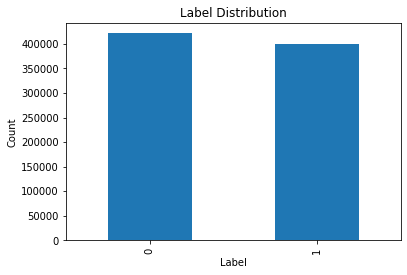

In [5]:
label_counts = df.iloc[:, -1].value_counts()
label_counts.plot(kind='bar')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# Split the data frame based on the "attack" and "normal" labels
attack_df = df[df['class3'] == 1]
normal_df = df[df['class3'] == 0]

# Split the "attack" and "normal" data frames into training and testing sets
attack_train_df, attack_test_df = train_test_split(attack_df, test_size=0.2)
normal_train_df, normal_test_df = train_test_split(normal_df, test_size=0.2)

# Concatenate the training and testing sets of both "attack" and "normal" data frames
df_training = pd.concat([attack_train_df, normal_train_df])
df_testing = pd.concat([attack_test_df, normal_test_df])

In [8]:



#df_testing = pd.read_csv("train_df.csv", na_values = missing_values, engine='python', skipinitialspace=True)
#df_training = pd.read_csv("test_df.csv", na_values = missing_values, engine='python', skipinitialspace=True)
columns_to_drop = [ 'Bad_checksum', 'is_SYN_with_RST','anomaly_alert','Scr_IP', 'Scr_port', 'Des_IP', 'Des_port']
df_testing = df_testing.drop(columns_to_drop, axis=1)
df_training = df_training.drop(columns_to_drop, axis=1)
df_training=df_training.fillna(df_training.median())
df_testing=df_testing.fillna(df_testing.median())
for i in ['Protocol', 'Service']:
    # Create the One Hot Encode DataFrame
    dum = pd.get_dummies(df_training[i])
    # Insert into the dataset DataFrame by Series
    for column_name in list(dum.columns):
        df_training.insert(1, str(i)+column_name, dum[column_name])
        df_training[str(i)+column_name] = df_training[str(i)+column_name].astype('int64')
    # Drop the old attribute's column
    df_training.drop(i, inplace=True, axis=1)
df_training[['is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload', 'FIN or RST']] = df_training[['is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload','FIN or RST']].astype(int)
for i in ['Protocol', 'Service']:
    # Create the One Hot Encode DataFrame
    dum = pd.get_dummies(df_testing[i])
    # Insert into the dataset DataFrame by Series
    for column_name in list(dum.columns):
        df_testing.insert(1, str(i)+column_name, dum[column_name])
        df_testing[str(i)+column_name] = df_testing[str(i)+column_name].astype('int64')
    # Drop the old attribute's column
    df_testing.drop(i, inplace=True, axis=1)
df_testing[['is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload', 'FIN or RST']] = df_testing[['is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload','FIN or RST']].astype(int)

df = pd.concat([df_training, df_testing], axis=0)

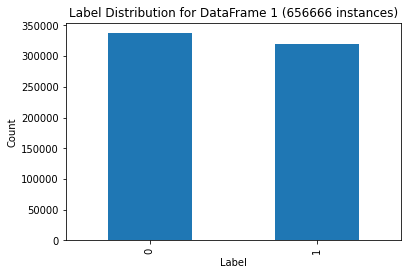

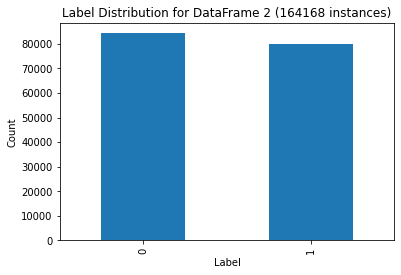

In [9]:
dataframes=[df_training,df_testing]

# loop through each DataFrame
for i, df in enumerate(dataframes):
    # count the number of instances for each label in the last column
    label_counts = df.iloc[:, -1].value_counts()
    # create a bar plot to visualize the label distribution
    label_counts.plot(kind='bar')
    plt.title(f"Label Distribution for DataFrame {i+1} ({len(df)} instances)")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()

In [10]:
from sklearn.cluster import KMeans

X = df.drop(columns=["class3"]) # assume "target" is the name of the binary classification target feature
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_


In [11]:
df.shape

df['class3'].value_counts()


0    84284
1    79884
Name: class3, dtype: int64

In [12]:
print(df_training.shape)
print (df_testing.shape)

(656666, 75)
(164168, 75)


In [13]:
#df_training['Scr_IP'].head

In [14]:
#164168+656666

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import copy
import time as time
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import chi2

#!pip install adversarial-robustness-toolbox >/dev/null
import os,sys
sys.path.append(os.path.dirname('../adversarial-robustness-toolbox/'))
from art.attacks.evasion import ZooAttack,ElasticNet,FastGradientMethod, BasicIterativeMethod, DeepFool, SaliencyMapMethod, CarliniL2Method, CarliniLInfMethod, CarliniL0Method
from art.classifiers import PyTorchClassifier

%matplotlib inline

pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

C:\Users\Juba\.conda\envs\py3.6\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: The module art.classifiers will be removed in ART 1.8.0 and replaced with art.estimators.classification


In [16]:
df_training['class3'].value_counts()

0    337133
1    319533
Name: class3, dtype: int64

In [36]:
min = df[:df_training.shape[0]].min()
max = df[:df_training.shape[0]].max()

for i in df.iloc[:, :-1].columns.to_numpy():
    # The min and max are computed on the training set
    df[i] = (df[i] - min[i]) / (max[i] - min[i])

In [37]:
# Split training and testing sets
df_training = df[:df_training.shape[0]]    
df_testing = df[df_training.shape[0]:]

In [59]:
# Get NumPy arrays from DataFrames
nd_training = df_training.values
nd_testing = df_testing.values

In [60]:
# Separating arguments (x) from lables (y)
x_train = nd_training[:, :-1]
y_train = nd_training[:, -1]
x_test = nd_testing[:, :-1]
y_test = nd_testing[:, -1]

In [61]:
# Make a copy of the data set as NumPy arrays
x_train_np = x_train.copy()
y_train_np = y_train.copy()
x_test_np = x_test.copy()
y_test_np = y_test.copy()

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Accuracy: 0.98, Precision: 0.99, Recall: 0.96, F1-score: 0.97


In [22]:
len(set(y_train))

2

In [62]:
# Define the neural network model
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(x_train.shape[1], 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, len(set(y_train)))
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.relu(self.fc3(out))
        out = self.softmax(self.fc4(out))
        return out


In [63]:

# Initialize the neural network model
model = DNN()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
for epoch in range(100):
    # Convert input data to PyTorch tensors
    inputs = torch.from_numpy((x_train)).float()
    targets = torch.from_numpy((y_train)).long()

    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.6681
Epoch [20/100], Loss: 0.5892
Epoch [30/100], Loss: 0.4475
Epoch [40/100], Loss: 0.3721
Epoch [50/100], Loss: 0.3504
Epoch [60/100], Loss: 0.3424
Epoch [70/100], Loss: 0.3389
Epoch [80/100], Loss: 0.3377
Epoch [90/100], Loss: 0.3372
Epoch [100/100], Loss: 0.3370


In [50]:
# Separating arguments (x) from lables (y)
x_train = nd_training[:, :-1]
y_train = nd_training[:, -1]
x_test = nd_testing[:, :-1]
y_test = nd_testing[:, -1]

In [49]:

# Test the model
with torch.no_grad():
    # Convert test data to PyTorch tensor
    inputs = torch.from_numpy(x_test).float()

    # Make predictions
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)

    # Calculate metrics
    cm = confusion_matrix(y_test, predicted)
    cr = classification_report(y_test, predicted)

    # Print metrics
    print('Confusion Matrix:')
    print(cm)
    print('Classification Report:')
    print(cr)

ValueError: max() arg is an empty sequence

In [ ]:
torch.save(model.state_dict(), "./model.pytorch")
model.load_state_dict(torch.load("./model.pytorch"))

In [ ]:
#data.columns

In [ ]:
for INPUT_CSV in ['adversarial_examples_FGSMmoh2.csv','adversarial_examples_BIMmoh2.csv']:#, 'adversarial_examples_CW2.csv', 'adversarial_examples_CWi.csv', 'adversarial_examples_DF.csv', 'adversarial_examples_ElasticNet.csv', 'adversarial_examples_FGSM.csv', 'adversarial_examples_JSMA.csv']:
       
    # Read the second file for testing and combine with the validation data
    test_data = pd.read_csv(INPUT_CSV)
    columns_to_drop = ['Unnamed: 0']
    test_data = test_data.drop(columns_to_drop, axis=1)
    
    X1 = test_data.drop('class3', axis=1)
    y1 = test_data['class3']
    
    X_full = np.concatenate((X1, x_test), axis=0)
    y_full = np.concatenate((y1, y_test), axis=0)
    # Test the model
    with torch.no_grad():
        # Convert test data to PyTorch tensor
        inputs = torch.from_numpy(X_full).float()

        # Make predictions
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        # Calculate metrics
        print(INPUT_CSV)
        print ("*"*50)
        cm = confusion_matrix(y_full, predicted)
        cr = classification_report(y_full, predicted)

        # Print metrics
        print('Confusion Matrix:')
        print(cm)
        print('Classification Report:')
        print(cr)

    
   
